# Forecasting individual concentraions without partial currents

### 1) Importing libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *


# from Data_sorting import Data_formatter_cycles

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_32756\1782324082.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/VScode//Data/Dataset_scaled_denoised.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[1:,:9]
X = X.drop('I', axis = 1)
y = data.iloc[1:,11:16]

In [3]:
print(X)

          S8_cur    S4_cur    S2_cur    S1_cur     V_cur    Sp_cur        EH  \
1       2.914558 -2.960002 -0.929154 -0.232859  3.965686 -0.925127  3.914506   
2       2.914450 -2.959872 -0.929154 -0.232859  3.953539 -0.925127  3.902619   
3       2.914342 -2.959743 -0.929154 -0.232858  3.941755 -0.925127  3.891043   
4       2.914234 -2.959613 -0.929154 -0.232858  3.930271 -0.925127  3.879762   
5       2.914126 -2.959483 -0.929154 -0.232858  3.919073 -0.925127  3.868761   
...          ...       ...       ...       ...       ...       ...       ...   
144008 -0.715584 -0.685340  2.665422 -0.146794 -0.871377  2.664142 -0.874464   
144009 -0.715584 -0.685383  2.665497 -0.146795 -0.871381  2.664216 -0.874468   
144010 -0.715584 -0.685426  2.665571 -0.146795 -0.871385  2.664290 -0.874473   
144011 -0.715584 -0.685469  2.665645 -0.146796 -0.871390  2.664365 -0.874477   
144012 -0.715584 -0.685512  2.665719 -0.146797 -0.871394  2.664439 -0.874481   

              EL  
1       4.072668  
2

# S8 Prediction

In [82]:
X_S8 = X.copy()
X_S8 = X_S8.drop('S1_cur', axis = 1)
X_S8 = X_S8.drop('S2_cur', axis = 1)
X_S8 = X_S8.drop('Sp_cur', axis = 1)
# X_S8 = X_S8.drop('V_cur', axis = 1)
# X_S8 = X_S8.drop('iH', axis = 1)
   

y_S8 = y['S8_cur.1']

X_numpy_S8 = X_S8.values
y_numpy_S8 = y_S8.values

# Split the data into train and test sets
X_train_S8, X_test_S8, y_train_S8, y_test_S8 = train_test_split(X_numpy_S8, y_numpy_S8, test_size=0.2, random_state=42)

In [83]:
model8 = Sequential()
model8.add(Dense(10, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model8.add(Dense(5,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model8.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model8.compile(optimizer='adam', loss='mean_squared_error')

model8.fit(X_train_S8, y_train_S8, epochs=20, batch_size=32)

Epoch 1/20


3601/3601 [==============================] - 3s 732us/step - loss: 0.0124
Epoch 2/20
3601/3601 [==============================] - 3s 758us/step - loss: 6.2025e-06
Epoch 3/20
3601/3601 [==============================] - 3s 754us/step - loss: 3.0498e-06
Epoch 4/20
3601/3601 [==============================] - 3s 741us/step - loss: 3.2809e-06
Epoch 5/20
3601/3601 [==============================] - 3s 761us/step - loss: 3.2186e-06
Epoch 6/20
3601/3601 [==============================] - 3s 756us/step - loss: 2.4703e-06
Epoch 7/20
3601/3601 [==============================] - 3s 748us/step - loss: 2.0068e-06
Epoch 8/20
3601/3601 [==============================] - 3s 752us/step - loss: 2.1774e-06
Epoch 9/20
3601/3601 [==============================] - 3s 743us/step - loss: 2.2225e-06
Epoch 10/20
3601/3601 [==============================] - 3s 718us/step - loss: 2.1963e-06
Epoch 11/20
3601/3601 [==============================] - 3s 742us/step - loss: 1.7371e-06
Epoch 12/20
3601/3601 [===========

In [84]:
# Evaluate the model on the test set
mse = model8.evaluate(X_test_S8, y_test_S8)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 647us/step - loss: 4.1473e-07
Mean Squared Error on Test Set: 4.1472571865597274e-07


# S4 prediction

In [14]:
X_S4 = X.copy()
# X_S4 = X_S4.drop('iL', axis = 1)
# X_S4 = X_S4.drop('iH', axis = 1)
X_S4 = X_S4.drop('S8_cur', axis = 1)

y_S4 = y['S4_cur.1']

X_numpy_S4 = X_S4.values
y_numpy_S4 = y_S4.values

# Split the data into train and test sets
X_train_S4, X_test_S4, y_train_S4, y_test_S4 = train_test_split(X_numpy_S4, y_numpy_S4, test_size=0.2, random_state=42)

In [88]:
model4 = Sequential()
model4.add(Dense(7, activation='relu', input_dim = 7))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model4.add(Dense(4,activation = 'relu'))
model4.add(Dense(2,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model4.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model4.compile(optimizer='adam', loss='mean_squared_error')

model4.fit(X_train_S4, y_train_S4, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 3s 794us/step - loss: 0.0595
Epoch 2/20
3601/3601 [==============================] - 3s 828us/step - loss: 2.3103e-04
Epoch 3/20
3601/3601 [==============================] - 3s 810us/step - loss: 3.1810e-05
Epoch 4/20
3601/3601 [==============================] - 3s 809us/step - loss: 2.0433e-05
Epoch 5/20
3601/3601 [==============================] - 3s 801us/step - loss: 1.2829e-05
Epoch 6/20
3601/3601 [==============================] - 3s 777us/step - loss: 6.9484e-06
Epoch 7/20
3601/3601 [==============================] - 3s 774us/step - loss: 4.2662e-06
Epoch 8/20
3601/3601 [==============================] - 3s 736us/step - loss: 3.8594e-06
Epoch 9/20
3601/3601 [==============================] - 3s 776us/step - loss: 4.1172e-06
Epoch 10/20
3601/3601 [==============================] - 3s 781us/step - loss: 3.6695e-06
Epoch 11/20
3601/3601 [==============================] - 3s 778us/step - loss: 3.8432e-06
Epoch 12/20
3601/3601 [

In [89]:
# Evaluate the model on the test set
mse = model4.evaluate(X_test_S4, y_test_S4)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 629us/step - loss: 8.4563e-07
Mean Squared Error on Test Set: 8.456327122985385e-07


# S2 prediction

In [19]:
X_S2 = X.copy()
X_S2 = X_S2.drop('EH', axis = 1)
X_S2 = X_S2.drop('S8_cur', axis = 1)
X_S2 = X_S2.drop('V_cur', axis = 1)

y_S2 = y['S2_cur.1']

X_numpy_S2 = X_S2.values
y_numpy_S2 = y_S2.values

# Split the data into train and test sets
X_train_S2, X_test_S2, y_train_S2, y_test_S2 = train_test_split(X_numpy_S2, y_numpy_S2, test_size=0.2, random_state=42)

In [24]:
model2 = Sequential()
model2.add(Dense(5, activation='relu', input_dim = 5))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model2.add(Dense(2,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

model2.fit(X_train_S2, y_train_S2, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 3s 780us/step - loss: 0.0449
Epoch 2/20
3601/3601 [==============================] - 3s 754us/step - loss: 9.1706e-05
Epoch 3/20
3601/3601 [==============================] - 3s 733us/step - loss: 2.0122e-05
Epoch 4/20
3601/3601 [==============================] - 3s 747us/step - loss: 1.0795e-05
Epoch 5/20
3601/3601 [==============================] - 3s 738us/step - loss: 7.0133e-06
Epoch 6/20
3601/3601 [==============================] - 3s 733us/step - loss: 4.3017e-06
Epoch 7/20
3601/3601 [==============================] - 3s 743us/step - loss: 2.1470e-06
Epoch 8/20
3601/3601 [==============================] - 3s 755us/step - loss: 1.5877e-06
Epoch 9/20
3601/3601 [==============================] - 3s 750us/step - loss: 1.3155e-06
Epoch 10/20
3601/3601 [==============================] - 3s 744us/step - loss: 1.3341e-06
Epoch 11/20
3601/3601 [==============================] - 3s 742us/step - loss: 8.1072e-07
Epoch 12/20
3601/3601 [

In [25]:
# Evaluate the model on the test set
mse = model2.evaluate(X_test_S2, y_test_S2)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 627us/step - loss: 5.2132e-08
Mean Squared Error on Test Set: 5.2131738925709215e-08


# S1 prediction

In [43]:
X_S1 = X.copy()
X_S1 = X_S1.drop('S8_cur', axis = 1)
# X_S1 = X_S1.drop('Sp_cur', axis = 1)
# X_S1 = X_S1.drop('S2_cur', axis = 1)


y_S1 = y['S1_cur.1']

X_numpy_S1 = X_S1.values
y_numpy_S1 = y_S1.values

# Split the data into train and test sets
X_train_S1, X_test_S1, y_train_S1, y_test_S1 = train_test_split(X_numpy_S1, y_numpy_S1, test_size=0.2, random_state=42)

In [101]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim = 7))
# model.add(Dense(6, activation='relu'))
# model1.add(Dense(12,activation = 'relu'))
model1.add(Dense(32,activation = 'relu'))
model1.add(Dense(16,activation = 'sigmoid'))
# model1.add(Dense(1,activation = 'tanh'))
model1.add(Dense(4,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

model1.fit(X_train_S1, y_train_S1, epochs=100, batch_size=32)

Epoch 1/100
3601/3601 [==============================] - 4s 915us/step - loss: 0.0975
Epoch 2/100
3601/3601 [==============================] - 3s 923us/step - loss: 6.0778e-04
Epoch 3/100
3601/3601 [==============================] - 3s 936us/step - loss: 4.9315e-04
Epoch 4/100
3601/3601 [==============================] - 3s 897us/step - loss: 5.1759e-04
Epoch 5/100
3601/3601 [==============================] - 3s 852us/step - loss: 4.2429e-04
Epoch 6/100
3601/3601 [==============================] - 3s 860us/step - loss: 3.1375e-04
Epoch 7/100
3601/3601 [==============================] - 3s 819us/step - loss: 3.7208e-04
Epoch 8/100
3601/3601 [==============================] - 3s 843us/step - loss: 2.9909e-04
Epoch 9/100
3601/3601 [==============================] - 4s 1ms/step - loss: 3.6745e-04
Epoch 10/100
3601/3601 [==============================] - 3s 892us/step - loss: 2.7967e-04
Epoch 11/100
3601/3601 [==============================] - 3s 900us/step - loss: 1.6440e-04
Epoch 12/100
3

In [100]:
# Evaluate the model on the test set
mse = model1.evaluate(X_test_S1, y_test_S1)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 698us/step - loss: 5.8081e-05
Mean Squared Error on Test Set: 5.808112837257795e-05


# Sp prediction

In [55]:
X_Sp = X.copy()
X_Sp = X_Sp.drop('EH', axis = 1)
X_Sp = X_Sp.drop('EL', axis = 1)
X_Sp = X_Sp.drop('S8_cur', axis = 1)
X_Sp = X_Sp.drop('V_cur', axis = 1)

y_Sp = y['Sp_cur.1']

X_numpy_Sp = X_Sp.values
y_numpy_Sp = y_Sp.values

# Split the data into train and test sets
X_train_Sp, X_test_Sp, y_train_Sp, y_test_Sp = train_test_split(X_numpy_Sp, y_numpy_Sp, test_size=0.2, random_state=42)

In [58]:
modelp = Sequential()
modelp.add(Dense(8, activation='relu', input_dim = 4))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
modelp.add(Dense(4,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
modelp.add(Dense(1, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
modelp.compile(optimizer='adam', loss='mean_squared_error')

modelp.fit(X_train_Sp, y_train_Sp, epochs=20, batch_size=32)

Epoch 1/20
3601/3601 [==============================] - 3s 743us/step - loss: 0.0466
Epoch 2/20
3601/3601 [==============================] - 3s 715us/step - loss: 1.3486e-04
Epoch 3/20
3601/3601 [==============================] - 3s 717us/step - loss: 1.0806e-04
Epoch 4/20
3601/3601 [==============================] - 3s 738us/step - loss: 8.2966e-05
Epoch 5/20
3601/3601 [==============================] - 3s 741us/step - loss: 4.1774e-05
Epoch 6/20
3601/3601 [==============================] - 3s 754us/step - loss: 3.4681e-05
Epoch 7/20
3601/3601 [==============================] - 3s 787us/step - loss: 3.5693e-05
Epoch 8/20
3601/3601 [==============================] - 3s 774us/step - loss: 2.7861e-05
Epoch 9/20
3601/3601 [==============================] - 3s 745us/step - loss: 2.8801e-05
Epoch 10/20
3601/3601 [==============================] - 3s 757us/step - loss: 2.2069e-05
Epoch 11/20
3601/3601 [==============================] - 3s 762us/step - loss: 2.9565e-05
Epoch 12/20
3601/3601 [

In [59]:
# Evaluate the model on the test set
mse = modelp.evaluate(X_test_Sp, y_test_Sp)
print(f"Mean Squared Error on Test Set: {mse}")

901/901 [==============================] - 1s 622us/step - loss: 5.6115e-06
Mean Squared Error on Test Set: 5.611478172795614e-06


# Important functions

In [62]:
# Bisection method function
def f(V, EH, EL, scales):
    # Defined in the code
    iH0 = 10
    iL0 = 5
    R = 8.3145
    T = 298
    F = 96490
    ar = 0.96
    return 2 * iH0 * ar * np.sinh((2 * F / (R * T)) * (V - EH)) + 2 * iL0 * ar * np.sinh((2 * F / (R * T)) * (V - EL)) + scales.iloc[0,-1]

# Bisection method adjusted to accept EH, EL, and I
def bisection_method(V_a, V_b, EH, EL, scales, tol=1e-9, max_iter=10000):
    if f(V_a, EH, EL, scales) * f(V_b, EH, EL, scales) >= 0:
        print("Bisection method fails.")
        return None

    V_m = V_a
    for _ in range(max_iter):
        V_m = (V_a + V_b) / 2
        if f(V_m, EH, EL, scales) == 0 or np.abs(f(V_m, EH, EL, scales)) < tol:   # (V_b - V_a)/2
            return V_m

        if f(V_m, EH, EL, scales) * f(V_a, EH, EL, scales) < 0:
            V_b = V_m
        else:
            V_a = V_m

    return V_m  # Return the approximation of the root


def param_finder_BV(V,EH,EL):
    iH0 = 10
    iL0 = 5
    R = 8.3145
    T = 298
    F = 96490
    ar = 0.96
    iH = 2*iH0*ar*np.sinh((4*F*(V-EH))/(2*R*T))
    iL = 2*iL0*ar*np.sinh((4*F*(V-EL))/(2*R*T))
    return iH, iL



def next_prediction(prediction, scales):

    array = []

    S8,S4,S2,S1,Sp,EH,EL = param_finder_Nernst(prediction,scale)

    # Initial brackets (guesses) for V
    V_a, V_b = 2.45,2.15 # Adjust these values based on your knowledge of the possible range of V

    # Find V
    V = bisection_method(V_a, V_b, EH, EL, scales)

    # iH, iL = param_finder_BV(V,EH,EL)

    V = (V - scales.iloc[0,4])/scales.iloc[1,4]

    EH = (EH - scales.iloc[0,6])/scales.iloc[1,6]

    EL = (EL - scales.iloc[0,7])/scales.iloc[1,7]


    array.append(prediction[0][0])
    array.append(prediction[0][1])
    array.append(prediction[0][2])
    array.append(prediction[0][3])
    array.append(V)
    array.append(prediction[0][4])
    array.append(EH)
    array.append(EL)

    array = np.array([array])

    return array 




def param_finder_Nernst(prediction, scales):
    # Defined in the code
    EH0 = 2.35
    EL0 = 2.195
    iH0 = 10
    iL0 = 5
    R = 8.3145
    T = 298
    F = 96490
    fh = 0.7296
    fl = 0.06654
    ar = 0.96

    # Unscale the concentration values to find S8 - Sp
    S8 = (prediction[0][0] * scales.iloc[1,0]) + scales.iloc[0,0]
    S4 = (prediction[0][1] * scales.iloc[1,1]) + scales.iloc[0,1]
    S2 = (prediction[0][2] * scales.iloc[1,2]) + scales.iloc[0,2]
    S1 = (prediction[0][3] * scales.iloc[1,3]) + scales.iloc[0,3]
    Sp = (prediction[0][4] * scales.iloc[1,5]) + scales.iloc[0,5]

    # S8 = (prediction[0][0])
    # S4 = (prediction[0][1])
    # S2 = (prediction[0][2])
    # S1 = (prediction[0][3])
    # Sp = (prediction[0][4])

    # Unscaled EH, EL

    EH = EH0 + (((R*T)/(4*F))*np.log(fh*(S8/(S4**2))))
    EL = EL0 + (((R*T)/(4*F))*np.log(fl*(S4/((S1**2)*S2))))

    return S8,S4,S2,S1,Sp,EH,EL

In [63]:
X_numpy = X.values
y_numpy = y.values

In [81]:

def mass_prediction(input):
    S8_features = ['S8_cur', 'S4_cur', 'V_cur', 'EH', 'EL']
    S4_features = ['S4_cur','S2_cur', 'S1_cur', 'V_cur', 'Sp_cur','EH', 'EL']
    S2_features = ['S4_cur','S2_cur', 'S1_cur', 'Sp_cur', 'EL']
    S1_features = ['S4_cur','S2_cur', 'S1_cur', 'V_cur', 'Sp_cur','EH', 'EL']
    Sp_features = ['S4_cur','S2_cur', 'S1_cur', 'Sp_cur']

    # Reshape the input to ensure it's 2D
    input_2d = input.reshape(1, -1)  # Reshape to 1 row, many columns

    input_df = pd.DataFrame(input_2d, columns = ['S8_cur', 'S4_cur','S2_cur', 'S1_cur', 'V_cur', 'Sp_cur','EH', 'EL'])

    S8_input = np.array(input_df[S8_features])
    S4_input = np.array(input_df[S4_features])
    S2_input = np.array(input_df[S2_features])
    S1_input = np.array(input_df[S1_features])
    Sp_input = np.array(input_df[Sp_features])

    S8 = model8.predict(S8_input)[0][0]
    S4 = model4.predict(S4_input)[0][0]
    S2 = model2.predict(S2_input)[0][0]
    S1 = model1.predict(S1_input)[0][0]
    Sp = modelp.predict(Sp_input)[0][0]

    array = [[S8,S4,S2,S1,Sp]]

    return array


# Multiple iterations

[[ 2.75583962 -2.76949624 -0.92914884 -0.23244107  2.28260561 -0.92512734
   2.26101299  2.32763776]]
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 18ms/step


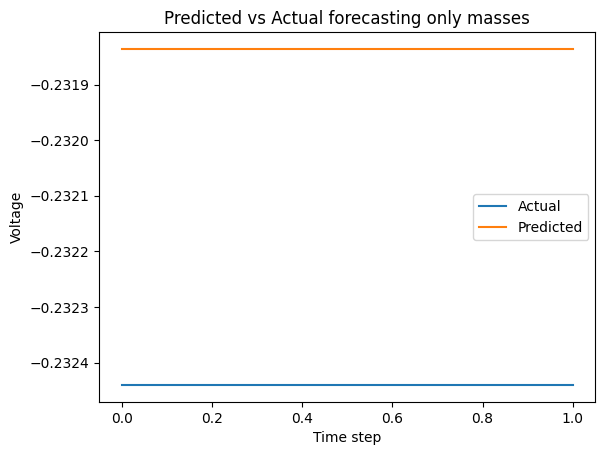

In [105]:
no_predictions = 2
start = 1500

input = np.array([X_numpy[start]])

print(input)

output = []

scale = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/VScode/Data/Scales_denoised.xlsx')

for i in range(no_predictions):
    
    next_prediction_array = mass_prediction(input)

    input = next_prediction(next_prediction_array, scale)

    # print(input)

    output.append(input)



plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[no_predictions + start][3])

plt.plot(plot_actual, label = 'Actual')



mass = []
for i in range(len(output)):
    mass.append(output[i][0][])

plt.plot(mass, label = 'Predicted')
plt.xlabel('Time step')
plt.ylabel('Voltage')
plt.title('Predicted vs Actual forecasting only masses')
plt.legend()

plt.show()